## 1. Orthodontic Distance

In [7]:
import pandas as pd 
import numpy as np
import pymc3 as pm
import arviz as az

In [2]:
orth_data=pd.read_csv('./ortho.csv')

In [3]:
orth_data

,y,age,Subject,Sex,Sex_coded
0,26.0,8,M01,Male,1
1,25.0,10,M01,Male,1
2,29.0,12,M01,Male,1
3,31.0,14,M01,Male,1
4,21.5,8,M02,Male,1
...,...,...,...,...,...
103,19.5,14,F10,Female,-1
104,24.5,8,F11,Female,-1
105,25.0,10,F11,Female,-1
106,28.0,12,F11,Female,-1


In [32]:
y=orth_data['y']
age=orth_data['age']
subject=orth_data['Subject']
sex=orth_data['Sex_coded']

In [33]:
n_subject=len(sex.unique())

In [34]:
random_model=pm.Model()

In [35]:
with random_model:
    
    ## set hyper priors 
    
    mu0=pm.Normal('mu0',0,10**8)
    
    tau0=pm.Gamma('tau0',0.01,0.01)
    sigma0=1/tau0
    
    ## random intercept 
    
    beta0=pm.Normal('beta0',mu=mu0,sigma=sigma0,shape=n_subject)
    
    ## fixed slope
    
    beta1=pm.Normal('beta1',0,10**8)
    beta2=pm.Normal('beta2',0,10**8)
    
    ### population variance 
    
    tau1=pm.Gamma('tau1',0.01,0.01)
    sigma=1/tau1
    
    ### distribution mean 
    
    y_mean=beta0[sex] +beta1*age +beta2*sex 
    
   ## likelihood function 
   
    obs=pm.Normal('obs',y_mean,sigma=sigma,observed=y)
    
    # Specify sampling options
    
    trace = pm.sample(100000, tune=10000, # burn-in 10k iterations
                           model=random_model)

    


/usr/local/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau1, beta2, beta1, beta0, tau0, mu0]


Sampling 4 chains for 10_000 tune and 100_000 draw iterations (40_000 + 400_000 draws total) took 652 seconds.
There were 25606 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5931552171769056, but should be close to 0.8. Try to increase the number of tuning steps.
There were 31846 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5364114248441731, but should be close to 0.8. Try to increase the number of tuning steps.
There were 47323 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.37832458942784797, but should be close to 0.8. Try to increase the number of tuning steps.
There were 24886 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6154031253554553, but 

## Fit the random effects model and plot the posterior densities of the five parameters

In [37]:
summary_df=pm.summary(trace)
summary_df

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu0,-52029.837,4.960885e+07,-1.060915e+08,1.051370e+08,176096.322,519648.391,32333.0,21059.0,1.02
beta0[0],-6529074.361,6.190815e+08,-3.197440e+08,3.252072e+08,6714716.159,4748184.236,33639.0,16810.0,1.02
beta0[1],16.502,1.113000e+00,1.455300e+01,1.857100e+01,0.056,0.039,412.0,62.0,1.01
beta1,0.664,9.900000e-02,4.830000e-01,8.440000e-01,0.005,0.004,459.0,4880.0,1.01
beta2,1.162,2.240000e-01,7.240000e-01,1.547000e+00,0.016,0.012,206.0,2805.0,1.02
tau0,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.000,123.0,213.0,1.03
tau1,0.443,3.200000e-02,3.910000e-01,5.150000e-01,0.002,0.001,373.0,195.0,1.01


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu0'}>,
        <AxesSubplot:title={'center':'beta0\n0'}>,
        <AxesSubplot:title={'center':'beta0\n1'}>],
       [<AxesSubplot:title={'center':'beta1'}>,
        <AxesSubplot:title={'center':'beta2'}>,
        <AxesSubplot:title={'center':'tau0'}>],
       [<AxesSubplot:title={'center':'tau1'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

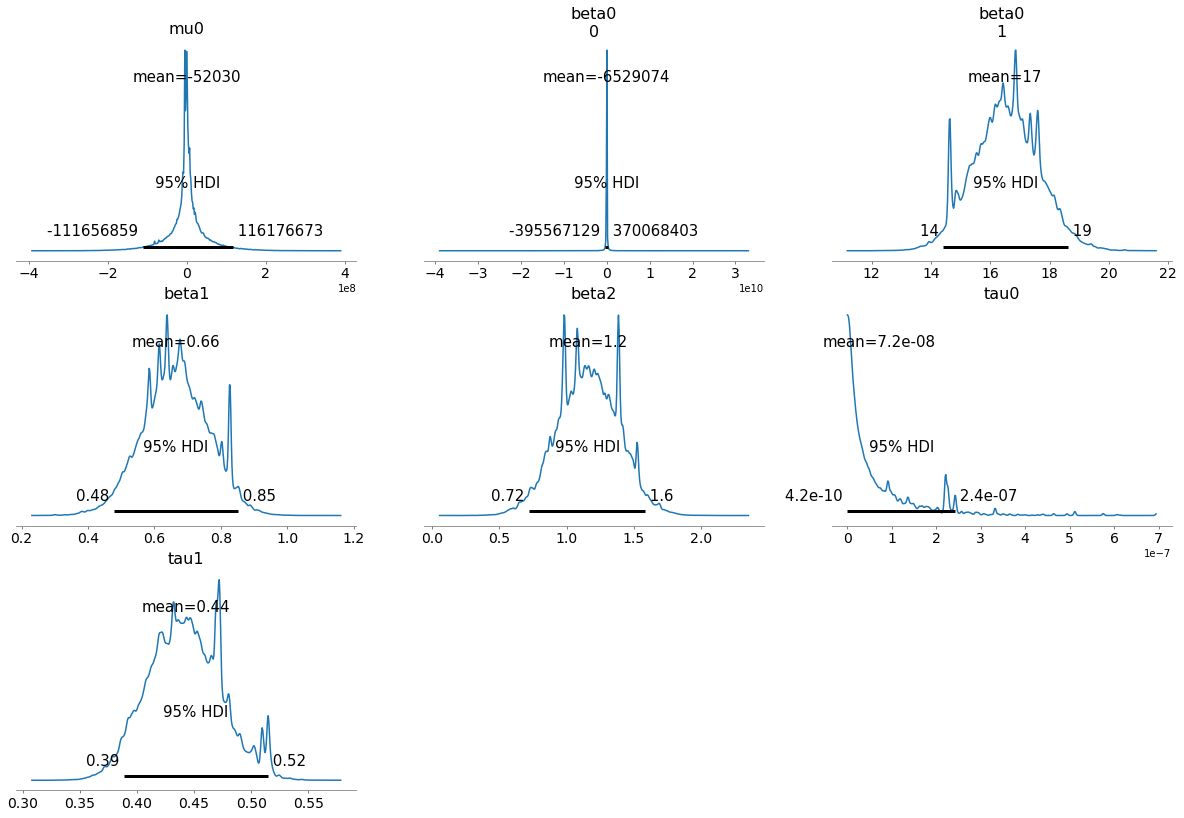

In [38]:
pm.plot_posterior(trace,hdi_prob=0.95)

## Plot the posterior density of ρ

In [43]:
ppc=pm.sample_posterior_predictive(trace,samples=10000,model=random_model)

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [50]:
prior_pred = pm.sample_prior_predictive(model=random_model)


/usr/local/lib/python3.9/site-packages/pymc3/distributions/continuous.py:514: RuntimeWarning: divide by zero encountered in power
  stats.norm.rvs, loc=mu, scale=tau ** -0.5, dist_shape=self.shape, size=size
/usr/local/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1094: RuntimeWarning: invalid value encountered in add
  vals = vals * scale + loc
/usr/local/lib/python3.9/site-packages/pymc3/distributions/transforms.py:221: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


In [60]:
tau0=prior_pred['tau0']
tau1=prior_pred['tau1']

rou=(1/tau0)/(1/tau0+1/tau1)

/var/folders/_f/1k5wm9qj1kb8s6fp2rmvwsy00000gn/T/ipykernel_14379/656014180.py:4: RuntimeWarning: divide by zero encountered in true_divide
  rou=(1/tau0)/(1/tau0+1/tau1)


<AxesSubplot:title={'center':'x'}>

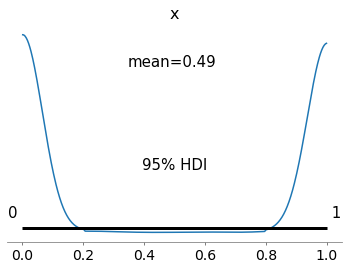

In [62]:
pm.plot_posterior(rou,hdi_prob=0.95)

Yes, it appears to be significantly different from zero from the posterior plot above.

## Fit the model ignoring the random effects

In [63]:
fixed_model=pm.Model()

In [64]:
with fixed_model:
    
  

   
      ## fixed intercept
    beta0=pm.Normal('beta0',0,10**8)
    
    ## fixed slope
    
    beta1=pm.Normal('beta1',0,10**8)
    beta2=pm.Normal('beta2',0,10**8)
    
    ### population variance 
    
    tau1=pm.Gamma('tau1',0.01,0.01)
    
    sigma=1/tau1
    
    ### distribution mean 
    
    y_mean=beta0 +beta1*age +beta2*sex 
    
   ## likelihood function 
   
    obs=pm.Normal('obs',y_mean,sigma=sigma,observed=y)
    
    # Specify sampling options
    
    trace = pm.sample(100000, tune=10000, # burn-in 10k iterations
                           model=fixed_model)


/usr/local/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau1, beta2, beta1, beta0]


Sampling 4 chains for 10_000 tune and 100_000 draw iterations (40_000 + 400_000 draws total) took 548 seconds.
There were 126 divergences after tuning. Increase `target_accept` or reparameterize.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'beta0'}>,
       <AxesSubplot:title={'center':'beta1'}>,
       <AxesSubplot:title={'center':'beta2'}>,
       <AxesSubplot:title={'center':'tau1'}>], dtype=object)

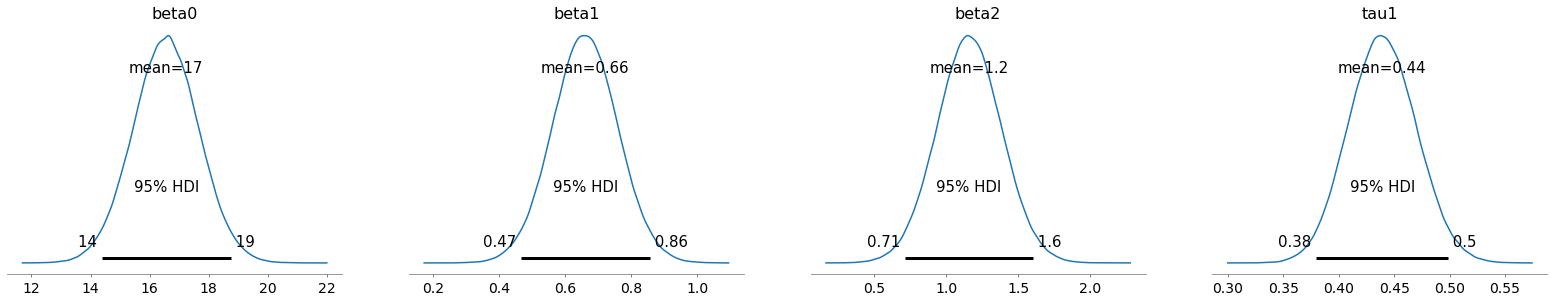

In [65]:
pm.plot_posterior(trace,hdi_prob=0.95)

In the randon effect model, we notice that the paosterior distributions of parameters do not follow normal distributions
except beta0 and the mean of beta0 is close to zero. In the fixed effect model, all parameters follow normal distributions.

# 2. Nanowire density

In [104]:
nano=pd.read_csv('./nanowire.csv')

In [116]:
nano

,x,y
0,9.666667,123.000000
1,9.666667,123.000000
2,2.500000,46.000000
3,2.500000,48.000000
4,5.000000,8.000000
5,5.000000,11.000000
6,7.500000,8.000000
7,7.500000,7.000000
8,10.000000,7.000000
9,10.000000,2.000000


In [117]:
x=nano['x']
x[x==0]=np.mean(x)
y=nano['y']
y[y==0]=np.mean(y)

In [124]:
nano_model=pm.Model()

## Obtain the posterior samples of the four parameters

In [125]:
with nano_model:
    
    
    
    theta1=pm.Lognormal('theta1',0,10)

    
    theta2=pm.Uniform('theta2',0,1)
    
    theta3=pm.Lognormal('theta3',0,10)
   
    
    theta4=pm.Lognormal('theta4',0,10)
  
    
    
    
    
    y_mean=theta1*np.exp(-theta2*x**2)+theta3*(1-np.exp(-theta2*x**2))*pm.math.invprobit(theta4)
    
    
    obs=pm.Poisson('obs',mu=y_mean, observed=y)
    
    trace=pm.sample(100000, tune=10000, # burn-in 10k iterations
                           model=nano_model)

/usr/local/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta4, theta3, theta2, theta1]


Sampling 4 chains for 10_000 tune and 100_000 draw iterations (40_000 + 400_000 draws total) took 671 seconds.
There were 903 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6966239901070939, but should be close to 0.8. Try to increase the number of tuning steps.
There were 655 divergences after tuning. Increase `target_accept` or reparameterize.
There were 112 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


## Obtain the posterior samples of the four parameters

In [126]:
summary_df=pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [127]:
summary_df

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta1,1.917337e+03,2.511783e+03,0.000,7149.607,1.816300e+01,1.284300e+01,15438.0,45956.0,1.00
theta2,5.940000e-01,2.300000e-01,0.243,1.000,2.000000e-03,1.000000e-03,15350.0,45536.0,1.00
theta3,3.995300e+01,1.305200e+01,24.364,57.382,6.364000e+00,4.855000e+00,6.0,78.0,1.73
theta4,1.853551e+17,1.129822e+20,0.000,4770285.219,1.850039e+17,1.308180e+17,6.0,82.0,1.73


## Find the predictive distribution of the density

In [129]:
from theano import shared
x_shared = shared(x)

x_updated = np.append(x, 2)
x_shared.set_value(x_updated)



In [130]:
new_ppc = pm.sample_posterior_predictive(trace, samples=10000, model=nano_model)

/usr/local/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [131]:
sample = new_ppc['obs'][:,-1]

In [133]:
pm.stats.hdi(sample)

array([16, 36])

# 3. Color Attraction for Oulema melanopus.

In [185]:
data=pd.DataFrame({'color':['Lemonyellow','Lemonyellow','Lemonyellow','Lemonyellow','Lemonyellow','Lemonyellow',
       'White','White','White','White','White','White', 
       'Green','Green','Green','Green','Green','Green',
       'Blue','Blue','Blue','Blue','Blue','Blue'],
                   'insects':[45 ,59 ,48, 46 ,38 ,47,
               21, 12, 14 ,17, 13 ,17,
               16, 11, 20, 21, 14, 7,
               37 ,32 ,15, 25, 39, 41]
    
})

data['color']=data['color'].astype('category')



color      category
insects       int64
dtype: object

In [199]:
n_subject=len(data['color'].unique())

In [187]:
data.groupby('color').agg({'insects': 'mean'
                          })


,insects
color,
Blue,31.500000
Green,14.833333
Lemonyellow,47.166667
White,15.666667


In [188]:
data.groupby('color').agg({'insects': 'var'
                          })

,insects
color,
Blue,98.300000
Green,28.566667
Lemonyellow,46.166667
White,11.066667


In [193]:
mcmc=pm.Model()

## Use MCMC software to conduct ANOVA analysis 

In [194]:
with mcmc:
    
    sigma = pm.Normal('sigma', 0,1)
    yellow = pm.Normal('Lemonyellow', mu = 47.17, sd=98.3)
    blue = pm.Normal('Blue', mu = 31.5, sd=28.56)
    green= pm.Normal('Green', mu = 14.8, sd=46.16)
    white= pm.Normal('White', mu = 15.67, sd=11.07)

    
     # Define likelihood
    likelihood = pm.Normal('color', 
                           mu = blue*data['color'][data['color']=='Blue'] + green*data['color'][data['color']=='Green']+ 
     12                        yellow*data['color'][data['color']=='Lemonyellow']+white*data['color'][data['color']=='White'] ,
                           sd=sigma, 
                           observed=data['insects'])
    
    trace=pm.sample(5000, model=mcmc)

TypeError: unsupported operand type(s) for *: 'FreeRV' and 'Categorical'

## state your conclusions 

Based on the above analysis, the color does affect the attractiveness in insects.